In [102]:
# we will be coding a graph to viz the basic math functio9n sand ops

#we iwll define  aclass vals
class vals:
    #now we want to know what vals tougether geretated theres 100 in this case
    #we will maintain  a tuple to handel this
    def __init__(self,data,_children=(),_ops='',_label=''):

        self.data = data
        #we pass it into a set so that thge space is effciently utilized
        self._prev = set(_children)
        self._ops = _ops
        self._label = _label

    def __repr__(self):

        return  f"the data is {self.data} "

    def __add__(self, other):

        return vals(self.data + other.data, (self,other),'+')    
          
    def __mul__(self, other):

        return vals(self.data * other.data, (self,other),'*')          




a = vals(2.0, _label='a')
b = vals(-3.0, _label='b')
c = vals(10.0, _label='c')
e = a*b ;e._label = 'e'
d = e+c ;d._label = 'd'
f = vals(-2.0, _label='f')
L = d*f ;L._label = 'L'

THIS IS TO CALCULATE THE GRADIENTS:

In [103]:
def calculate_grad(node): #this depecits d(L1)/d(x)

    # x = node._label
    # #this is the samll val h wrtto which we cal gradient 
    # h = 0.0001 
    # #we wil def local vars
    # a1=a.data
    # b1=b.data
    # c1=c.data
    # d1=d.data
    # e1=e.data
    # f1=f.data

    # #we will cal the bump
    # if(x=='a'):
    #     a1 = a1 + h
    # if(x=='b'):
    #     b1 = b1 + h
    # if(x=='c'):
    #     c1 = c1 + h
    # if(x=='d'):
    #     d1 = d1 + h
    # if(x=='e'):
    #     e1 = e1 + h
    # if(x=='f'):
    #     f1 = f1 + h

    # L1 = L.data
    # #now we need to cal L2
    # e1 = a1*b1 
    # d1 = e1+c1 
    # L2 = d1*f1 

    # grad = (L2-L1)/h
    # return grad

    #well now we can make this code more efficient
    h = 1e-4
    #keeps labels and nodes together
    val = {'a':a , 'b':b , 'c':c , 'd':d, 'e':e , 'f':f , 'L':L}
    #this maps the smae keys with the data vals
    values = {k: v.data for k,v in val.items() }

    #this is bump
    if node._label == 'a' or 'b' or 'c' or 'f':
        values[node._label] += h
    #anything with  write should only be bumped after the write

    values['e'] = values['a']* values['b']
    if node._label == 'e':
        values[node._label] += h

    values['d'] = values['e'] + values['c']
    if node._label == 'd':
        values[node._label] += h

    L2 = values['d']* values['f']

    L1 = L.data
    return (L2-L1)/h

In [104]:
i =  calculate_grad(L)
print(i)

0.0


GENERATE THE GRAPH USING GRAPVIZ:

In [105]:
# now we can code an expressioin graph out 
#we will use the graphviz lib
from graphviz import Digraph

#this will populate the nodes and edges set by usingDFS
def trace(root):

    nodes,edges = set(),set()
    #his reccursive function will do thetraversal
    def recc(v):

        if v not in nodes:
            #we add the ele not the visited set 
            nodes.add(v)
            for n in v._prev:
                #add the edges to the set
                edges.add((n,v))
                #call the recc function
                recc(n)

    recc(root)
    return nodes,edges



def create_graph(root):

    #this derfines the export format of the graph and also how irts aligned
    make = Digraph(format= 'svg', graph_attr= {'rankdir':'LR'})

    nodes,edges = trace(root)

    for n in nodes:

        #we will caluculate the grads here
        n_grad = calculate_grad(n)

        uid = str(id(n))
        make.node(name= uid, label= "{%s | data= %.4f | gradient= %.4f}"% (n._label, n.data, n_grad ), shape= 'record' )

        if n._ops:
            #we will create a dummy node if its an op
            make.node(name= uid+n._ops, label= (n._ops))
            make.edge(uid+n._ops, uid)

    for n1, n2 in edges:

        make.edge(str(id(n1)), str(id(n2)) + n2._ops  )

    return make

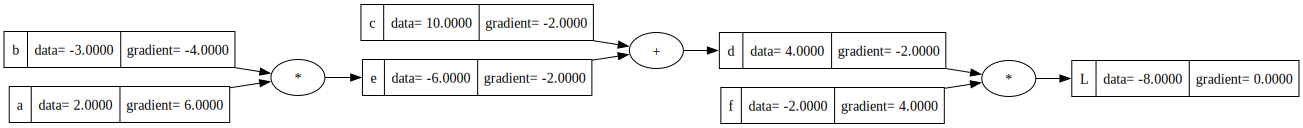

In [106]:
create_graph(L)